In [59]:
# Import libraries: requests, pandas, BeautifulSoup
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs

# Getting the contents from the url
url = "https://www.imdb.com/list/ls095374765/?sort=list_order,asc&st_dt=&mode=grid&page=1&ref_=ttls_vw_grd"

source=requests.get(url)
soup=bs(source.content,'html.parser')
# print(soup)

# Scraping the movie's title
tit=soup.find_all('div',class_="title")
title = [tit.text.replace('\n','').replace(' ','') for tit in tit]
# print(title)

index=[]
for i in range(100):
    index.append(i)

# Scraping the movie's year
yr = soup.find_all('span',class_="lister-item-year text-muted unbold")
year = [year.text.replace('\n','').replace('(','').replace(')','') for year in yr]
# year

# Scraping the movie's length
time =soup.find_all('span',class_="runtime")
run_time = [time.text for time in time]
# run_time

# Scraping the movie's genre
gen=soup.find_all('span',class_="genre")
genre = [gen.text.replace('\n','').replace(' ','') for gen in gen]
# genre

# Scraping the movie's rating
rat=soup.find_all('div',class_="ipl-rating-star small")
rating = [rat.text.replace('\n','') for rat in rat]
# rating

# Scraping the movie's director & actor
act=soup.find_all('p',class_="text-muted text-small")

q=[]
for i in act:
    q.append(i.find_all('a'))

for i in q:
    if i ==[]:
        q.remove(i)  

n=[]        
for i in q:
    for j in i:
        n.append(j)
# print(n)   

Actor=[]
Director=[]
for i,j in enumerate(n):
    if i%5==0:
        Director.append(j.text)
    else:
        Actor.append(j.text)
# print(Director)

u=[]
l=''
for i,j in enumerate(Actor):
    if i%4==0:
        l='@'+j
    else:
        l=l+','+j
    u.append(l)
# print(u)

act=[]
for i,j in enumerate(u):
    if i%4==3:
        act.append(j)
acto=[]
for i in act:
    acto.append(i.split('@'))
    
Actor=[]
for i in acto:
    for j in i:
        if j!='':
            Actor.append(j)

# Actor

# Scraping the movie's review
review= soup.find_all('p',class_='')
Review=[Review.text.replace('\n','') for Review in review ]
# Review

In [148]:
Data=list(zip(title,year,run_time,genre,rating,Director,Actor,Review))
# creating dataframe 
df = pd.DataFrame(Data,columns=['Title','Year','Length','Genre','Rating','Director','Actor','Review'])                

In [75]:
# creating csv file
A=df.to_csv('IMDB_MV_Review.csv',index=False)

In [77]:
# Import libraries: pandas, numpy, seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
# For EDA read the file
df1 = pd.read_csv(r"Downloads\IMDB_Movie_Review.csv")
#df1

# Each year movie count plot

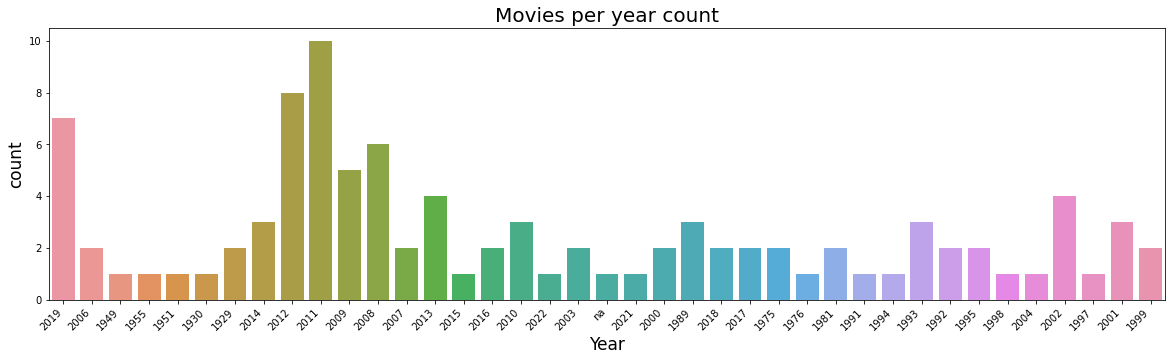

In [135]:
plt.figure(figsize = (20,5))
x=sns.countplot(x ='Year',data = df1)
x.set_title("Movies per year count", fontsize = 20)
plt.xlabel("Year",fontsize=17)
plt.ylabel("count", fontsize=17)
x.set_xticklabels(x.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Count of movie genre wise 

In [153]:
df1['Genre']
b1=[]
for i in df1['Genre']:
    b1.append(i.split(','))
b2=[]
for i in b1:
    for j in i:
        cc.append(j)
# b2
b3=[]
for i in b2:
    b3.append(i.split())
b4=[]
for i in b3:
    for j in i:
        b4.append(j)
# b4

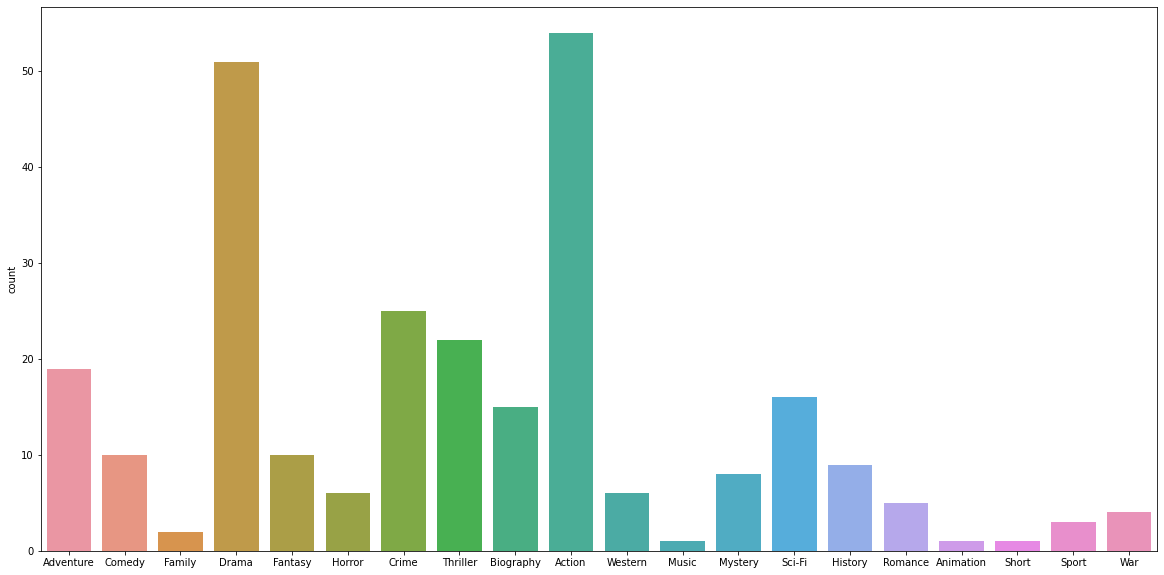

In [154]:
plt.figure(figsize=(20,10))
sns.countplot(x=aa,data=df1)
plt.show()

In [80]:
df1['genre'] = df1['Genre'].apply(lambda text: text.split(',')[0])
df1['genre'].value_counts()

Action       54
Biography    13
Drama        10
Crime         7
Adventure     5
Western       3
Comedy        2
Horror        2
Animation     1
Sci-Fi        1
Fantasy       1
Name: genre, dtype: int64

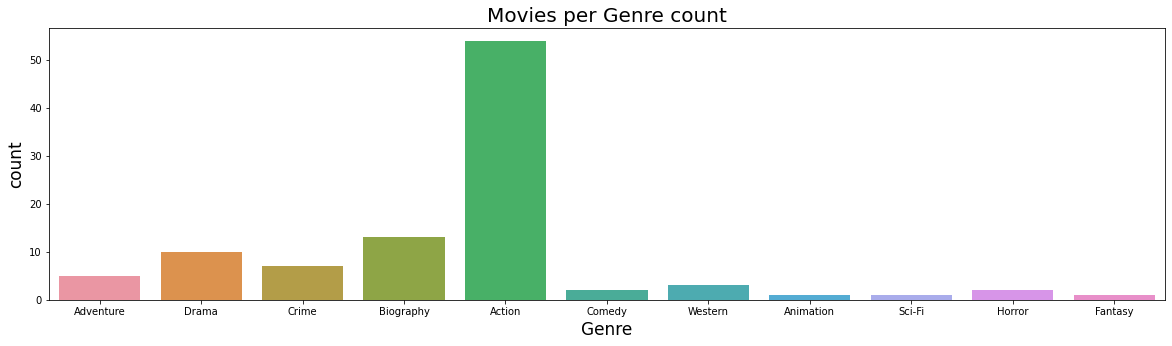

In [81]:
plt.figure(figsize=(20,5))
m=sns.countplot(x='genre', data = df1)
m.set_title("Movies per Genre count", fontsize = 20)
plt.xlabel("Genre",fontsize=17)
plt.ylabel("count", fontsize=17)
plt.show()

# Number of movie each actor has done

In [113]:
df1['actor']= df1['Actor'].apply(lambda text: text.split(',')[0])
df.drop(columns='Actor', inplace=True)
# df1['actor'].value_counts()

In [101]:
df1['actor'].unique()[:5]

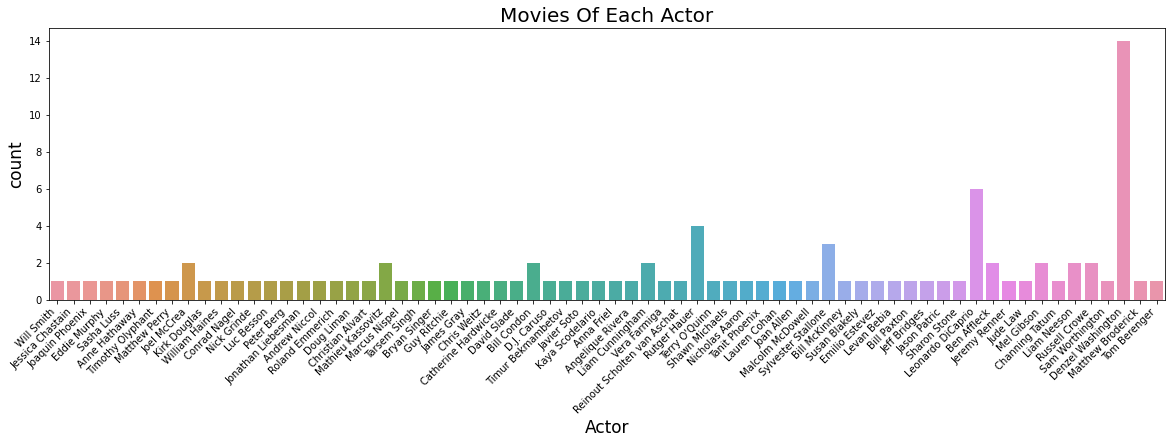

In [109]:
plt.figure(figsize=(20,5))
m=sns.countplot(x='actor', data = df1)
m.set_title("Movies Of Each Actor", fontsize = 20)
plt.xlabel("Actor",fontsize=17)
plt.ylabel("count", fontsize=17)
m.set_xticklabels(m.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


# Combined word cloud of Review of all movie

In [328]:
# Installing WordCloud library
pip install WordCloud

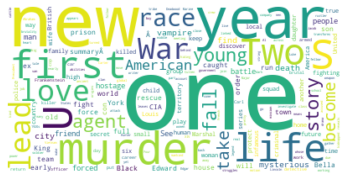

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

text = " ".join(Review for Review in df1.Review)

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

plt.show()

# Removing the stopwords from review of each movie

In [142]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
# print(stop_words)

df1['Review_1'] = df1['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
# df1['Review_1']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [140]:
df1['Review'][0]

'A kind-hearted street urchin and a power-hungry Grand Vizier vie for a magic lamp that has the power to make their deepest wishes come true.'

In [143]:
df1['Review_1'][0]

'A kind-hearted street urchin power-hungry Grand Vizier vie magic lamp power make deepest wishes come true.'

# Removing the html strips

In [144]:
a1= r"A kind-hearted street urchin <class=lister-item mode-grid]>"

In [145]:
import re

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)


In [146]:
# print(remove_tags(a1))

# Removing the square brackets

In [196]:
l1= '[[herbicide]]s and [[defoliant]]s used by the [[United States armed forces|U.S. military]] as part of its [[herbicidal warfare]] program.'

In [197]:
import re
re.sub(r'\[\[(?:[^|\]]*\|)?([^\]]*)]]', r'\1', l1)

'herbicides and defoliants used by the U.S. military as part of its herbicidal warfare program.'

# Removing special characters

In [200]:
p='@#%jvhj!/?dhs'
import re
re.sub('\W+','', p)

'jvhjdhs'

In [204]:
import re
re.sub('[^A-Za-z0-9]+', '',p)

'jvhjdhs'

# Sentiment Analysis

In [126]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [127]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(df1['Review'][0])

{'neg': 0.0, 'neu': 0.72, 'pos': 0.28, 'compound': 0.7506}

In [128]:
r1= []
for i in range(len(df1['Review'])):
    r1.append(sia.polarity_scores(df1['Review'][i]))
negative=[]    
for i in r1:
    negative.append(i['neg'])
# print(negative)    

In [129]:
neutral=[]    
for i in r1:
    neutral.append(i['neu'])
# print(neutral)

In [130]:
positive=[]    
for i in r1:
    positive.append(i['pos'])
# print(positive)

In [131]:
compound=[]    
for i in r1:
    compound.append(i['compound'])
# print(compound)

In [132]:
df1['Negative']=negative
df1['Neutral']=neutral
df1['Positive']=positive
df1['Compound']=compound

In [133]:
df1.head()

,Title,Year,Length,Genre,Rating,Director,Actor,Review,genre,actor,Review_1,Negative,Neutral,Positive,Compound
0,Aladdin,2019,128 min,"Adventure,Comedy,Family",6.9,Guy Ritchie,"Will Smith,Mena Massoud,Naomi Scott,Marwan Ken...",A kind-hearted street urchin and a power-hungr...,Adventure,Will Smith,A kind-hearted street urchin power-hungry Gran...,0.000,0.720,0.280,0.7506
1,ItChapterTwo,2019,169 min,"Drama,Fantasy,Horror",6.5,Andy Muschietti,"Jessica Chastain,James McAvoy,Bill Hader,Isaia...",Twenty-seven years after their first encounter...,Drama,Jessica Chastain,Twenty-seven years first encounter terrifying ...,0.331,0.669,0.000,-0.9081
2,Joker,2019,122 min,"Crime,Drama,Thriller",8.4,Todd Phillips,"Joaquin Phoenix,Robert De Niro,Zazie Beetz,Fra...",A mentally troubled stand-up comedian embarks ...,Crime,Joaquin Phoenix,A mentally troubled stand-up comedian embarks ...,0.272,0.535,0.193,-0.4404
3,DolemiteIsMyName,2019,118 min,"Biography,Comedy,Drama",7.2,Craig Brewer,"Eddie Murphy,Keegan-Michael Key,Mike Epps,Crai...",Eddie Murphy portrays real-life legend Rudy Ra...,Biography,Eddie Murphy,Eddie Murphy portrays real-life legend Rudy Ra...,0.244,0.622,0.135,-0.6369
4,Anna,2019,118 min,"Action,Thriller",6.6,Luc Besson,"Sasha Luss,Helen Mirren,Luke Evans,Cillian Murphy",Beneath Anna Poliatova's striking beauty lies ...,Action,Sasha Luss,Beneath Anna Poliatova's striking beauty lies ...,0.184,0.612,0.204,0.1796
